In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import skimage.morphology
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

<h1>Working with Images and Text Lab</h1>

<h3>Image Size</h3>

This delicious hamburger image is a standard RGB image. How much memory (in bytes) will this image take? You can either compute the answer or read the image and see how much space it takes.

In [3]:
hamburger = skimage.io.imread("data/hamburger.jpg")
hamburger.nbytes

783126

<h3>Histograms</h3>

The images in this figure display, respectively: a part of a cat's eye, completely random noise, and three concentric circles of different brightness. Which image(s) produced Histogram B?

In [4]:
cat_eye = skimage.io.imread("data/cat_eye.jpg")
noise = skimage.io.imread("data/noise.jpg")
circles = skimage.io.imread("data/circles.png")
images = [cat_eye, noise, circles]

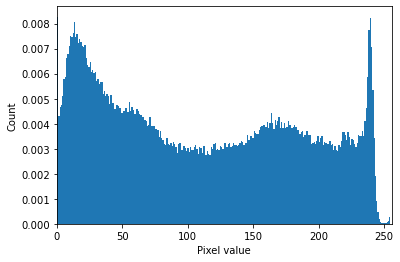

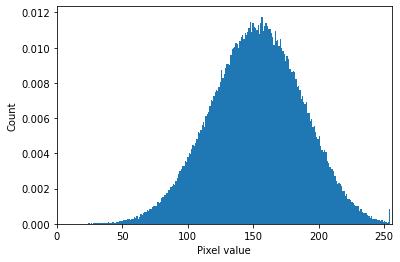

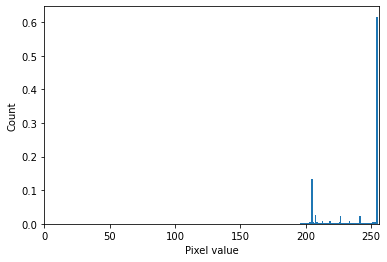

In [5]:
for image in images:
    plt.hist(image.ravel(), bins=256, density=True)

    plt.xlim(0, 256)
    plt.xlabel("Pixel value")
    plt.ylabel("Count")

    plt.show()

<h3>Dominant Channel</h3>

An indication of the dominant color of the image can be the dominant channel, i.e. the channel (R, G, or B) with the greatest average brightness (intensity). What is the mean brightness of the dominant channel in the hamburger image? Round your answer to two decimal places.

In [6]:
hamburger_red, hamburger_green, hamburger_blue = [hamburger[:, :, i] for i in range(3)]
hamburger_red.mean().round(2), hamburger_green.mean().round(2), hamburger_blue.mean().round(2)

(90.04, 84.06, 37.24)

<h3>Morphology</h3>

Read the blue channel of the hamburger image. Perform binary opening on this channel using a 3x3 square as the structuring element. How many white pixels does the resulting image contain?

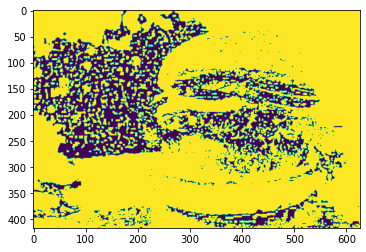

In [7]:
a = np.ones((3,3), dtype=np.int64)
hamburger_binary_blue = skimage.morphology.binary_opening(hamburger_blue, selem=skimage.morphology.square(3)).astype("int64")
plt.imshow(hamburger_binary_blue)
plt.show()

In [8]:
print("White pixels count:", (hamburger_binary_blue[hamburger_binary_blue==1]).shape )
print('Number of white pixels:', np.sum(hamburger_binary_blue))

White pixels count: (202410,)
Number of white pixels: 202410


<h3>Pride and Prejudice</h3>

The most popular text in Project Gutenberg is the book "Pride and Prejudice" by Jane Austen, located at http://www.gutenberg.org/files/1342/1342-0.txt. Split by non-word characters to get all words. 

How many times does the word "pride" occur in the entire Web page? Don't forget to account for different casing.
How many times does the word "prejudice" occur in the entire Web page?

In [9]:
with open("data/pride_and_prejudice.txt", "r", encoding="utf8") as file:
    pride_prejudice = file.read()

In [10]:
print(len(pride_prejudice))

775714


In [11]:
pride_prejudice_words = re.split("\W+", pride_prejudice.lower())
pride_prejudice_words_count = Counter(pride_prejudice_words)

In [12]:
pride_prejudice_words_count['pride'], pride_prejudice_words_count['prejudice']

(52, 10)

<h3>Protagonist</h3>

Remove all stopwords. Once again, count all remaining words. What's the name of the protagonist (main character) in the book?

In [13]:
stop_words = stopwords.words("english")
# We get all the words that aren't "stopwords"
pride_prejudice_words_cleaned = [word for word in pride_prejudice_words if word not in stop_words]
pride_prejudice_words_cleaned_counter = Counter(pride_prejudice_words_cleaned)
pride_prejudice_words_cleaned_counter.most_common(20)

[('mr', 785),
 ('elizabeth', 635),
 ('could', 526),
 ('would', 468),
 ('darcy', 417),
 ('said', 401),
 ('mrs', 343),
 ('much', 327),
 ('bennet', 323),
 ('must', 315),
 ('bingley', 306),
 ('jane', 294),
 ('miss', 283),
 ('one', 270),
 ('know', 237),
 ('though', 226),
 ('well', 224),
 ('never', 218),
 ('sister', 217),
 ('soon', 216)]